In [725]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import warnings
from matplotlib.pyplot import xticks
%matplotlib inline
warnings.filterwarnings('ignore')

In [726]:
#CreditRisk_df.columns=CreditRisk_df.columns.str.strip()

In [727]:
LeadScore_df = pd.read_csv("Lead-analysis/LeadGenN.csv", encoding='utf-8-sig',parse_dates=['Web_Date','SubYearMonth','Lead_Capture_Date','Inception_Date_LT'])
LeadScore_df

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Date,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Merged Years in Business,Years_in_Business
0,220000.0,2020-09-12,0,1,2021-09-12,00Q4u00001h8MyqEAE,24,SCORPORATION,902934.0,ACCOMMODATIONANDFOODSERVICES,...,1101.0,Lending Tree,NaN,2021-09-12,NaN,$200k-$500k,NaN,NaN,-1,1
1,225000.0,2020-09-06,0,0,2021-09-10,00Q4u00001h88vdEAA,19,LLC,900069.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-10,NaN,$200k-$500k,NaN,NaN,-1,1
2,115000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy2ocEAA,24,LLC,902932.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$100k-$200k,NaN,NaN,-1,1
3,200000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy7ezEAA,10,LLC,900069.0,RETAILTRADE,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$200k-$500k,NaN,NaN,-1,1
4,840000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy9GhEAI,21,LLC,900070.0,OTHERSERVICESEXCEPTPUBLICADMINISTRATION,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$500k-$1mm,NaN,NaN,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79163,NaN,NaT,0,0,2021-09-13,00Q4u00001gRVFaEAO,15,NaN,NaN,NaN,...,5192.0,Direct,"$25,000 to $50,000",2021-09-13,NaN,$100k-$200k,1 to 3 Years,NaN,1 to 3 Years,1 to 3 Years
79164,0.0,NaT,0,0,2021-09-13,00Q4u00001cKc1AEAS,17,NaN,NaN,NaN,...,5061.0,Direct,"$25,000 to $50,000",2021-09-13,NaN,"Less than $100,000",1 to 3 Years,0.0,1 to 3 Years,1 to 3 Years
79165,900000.0,NaT,0,0,2021-09-13,00Q4u00001h8XgxEAE,13,NaN,NaN,NaN,...,1280.0,Strategic Partners,NaN,NaT,NaN,$500k-$1mm,NaN,NaN,NaN,NaN
79166,NaN,NaT,0,0,2021-09-13,00Q4u00001gRVrFEAW,19,NaN,NaN,NaN,...,5061.0,Direct,"$25,000 to $50,000",2021-09-13,NaN,$200k-$500k,1 to 3 Years,NaN,1 to 3 Years,1 to 3 Years


In [728]:
LeadScore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79168 entries, 0 to 79167
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   AnnualRevenue                 54552 non-null  float64       
 1   Inception_Date_LT             23390 non-null  datetime64[ns]
 2   Is_Funded                     79168 non-null  int64         
 3   Is_Submitted                  79168 non-null  int64         
 4   Lead_Capture_Date             79168 non-null  datetime64[ns]
 5   LEAD_ID                       79168 non-null  object        
 6   Lead_Score                    79168 non-null  int64         
 7   Legal_Entity_Type_LT          23390 non-null  object        
 8   LT_FILTERID                   24698 non-null  object        
 9   LTTest_Naics                  17413 non-null  object        
 10  OPPORTUNITY_ID                79168 non-null  object        
 11  Requested_Amount            

In [729]:
LeadScore_df.isnull().sum()

AnnualRevenue                   24616
Inception_Date_LT               55778
Is_Funded                           0
Is_Submitted                        0
Lead_Capture_Date                   0
LEAD_ID                             0
Lead_Score                          0
Legal_Entity_Type_LT            55778
LT_FILTERID                     54470
LTTest_Naics                    61755
OPPORTUNITY_ID                      0
Requested_Amount                40611
Self_Graded_Credit               9524
Submit_for_Pre_Approval_Date    66528
SubYearMonth                    66528
Type_of_Entity                  67212
Web_Ad_Outlet                    1108
Web_Ad_Outlet_Source              445
Web_Amount_to_Borrow            44178
Web_Date                        24515
Web_Form_Name                   79168
Web_Gross_Annual_Sales          14969
Web_Time_in_Business            43962
Year_Established                59420
Merged Years in Business        20572
Years_in_Business               20572
dtype: int64

In [730]:
LeadScore_df.columns

Index(['AnnualRevenue', 'Inception_Date_LT', 'Is_Funded', 'Is_Submitted',
       'Lead_Capture_Date', 'LEAD_ID', 'Lead_Score', 'Legal_Entity_Type_LT',
       'LT_FILTERID', 'LTTest_Naics', 'OPPORTUNITY_ID', 'Requested_Amount',
       'Self_Graded_Credit', 'Submit_for_Pre_Approval_Date', 'SubYearMonth',
       'Type_of_Entity', 'Web_Ad_Outlet', 'Web_Ad_Outlet_Source',
       'Web_Amount_to_Borrow', 'Web_Date', 'Web_Form_Name',
       'Web_Gross_Annual_Sales', 'Web_Time_in_Business', 'Year_Established',
       'Merged Years in Business', 'Years_in_Business'],
      dtype='object')

In [731]:
LeadScore_df.groupby('Is_Submitted').size()

Is_Submitted
0    66528
1    12640
dtype: int64

In [732]:
LeadScore_df['Web_Amount_to_Borrow'] = LeadScore_df['Web_Amount_to_Borrow'].str.replace(',','')

In [733]:
LeadScore_mask = (LeadScore_df.Web_Ad_Outlet_Source == "Lending Tree") 

Lead_filtered= LeadScore_df[LeadScore_mask]
Lead_filtered

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Date,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Merged Years in Business,Years_in_Business
0,220000.0,2020-09-12,0,1,2021-09-12,00Q4u00001h8MyqEAE,24,SCORPORATION,902934.0,ACCOMMODATIONANDFOODSERVICES,...,1101.0,Lending Tree,NaN,2021-09-12,NaN,$200k-$500k,NaN,NaN,-1,1
1,225000.0,2020-09-06,0,0,2021-09-10,00Q4u00001h88vdEAA,19,LLC,900069.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-10,NaN,$200k-$500k,NaN,NaN,-1,1
2,115000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy2ocEAA,24,LLC,902932.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$100k-$200k,NaN,NaN,-1,1
3,200000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy7ezEAA,10,LLC,900069.0,RETAILTRADE,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$200k-$500k,NaN,NaN,-1,1
4,840000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy9GhEAI,21,LLC,900070.0,OTHERSERVICESEXCEPTPUBLICADMINISTRATION,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$500k-$1mm,NaN,NaN,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62616,NaN,NaT,0,0,2021-06-23,00Q4u00001fu0DDEAY,17,NaN,NaN,NaN,...,1101.0,Lending Tree,$25000 to $50000,2021-06-23,NaN,NaN,1 to 3 Years,NaN,1 to 3 Years,1 to 3 Years
64524,NaN,NaT,0,0,2021-07-05,00Q4u00001fvSByEAM,14,NaN,NaN,NaN,...,1101.0,Lending Tree,$5000 to $10000,2021-07-05,NaN,NaN,Greater than 3 Years,NaN,Greater than 3 Years,Greater than 3 Years
70202,NaN,NaT,0,0,2021-07-31,00Q4u00001gTPIYEA4,8,NaN,NaN,NaN,...,1101.0,Lending Tree,$25000 to $50000,2021-07-31,NaN,NaN,Less than 6 Months,NaN,Less than 6 Months,Less than 6 Months
70219,NaN,NaT,0,0,2021-07-31,00Q4u00001gTPWfEAO,17,NaN,NaN,NaN,...,1101.0,Lending Tree,$10000 to $25000,2021-07-31,NaN,NaN,Greater than 3 Years,NaN,Greater than 3 Years,Greater than 3 Years


In [742]:
Lead_filtered.groupby('LTTest_Naics').sum()['Is_Submitted']

LTTest_Naics
ACCOMMODATIONANDFOODSERVICES                   143
ACCOUNTANTS                                      0
ADMINSUPPORTWASTEMGMTANDREMEDIATIONSERVICES     14
ADVERTISING_AGENCIES                             0
AGRICULTUREFORESTRYFISHINGANDHUNTING            43
                                              ... 
VENDING                                          1
VETERINARY_SERVICES                              0
VITAMIN_RETAILERS                                0
WHOLESALETRADE                                  61
Wholesale Trade                                  0
Name: Is_Submitted, Length: 125, dtype: int64

In [749]:
#print(Lead_filtered['LTTest_Naics'].unique())

In [734]:
Lead_filtered['month'] = pd.DatetimeIndex(Lead_filtered['Lead_Capture_Date']).month

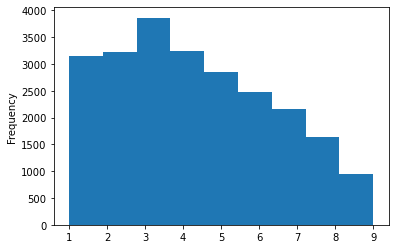

In [735]:
ax = Lead_filtered['month'].plot.hist(bins=9)

In [681]:
Lead_filtered.isnull().sum()

AnnualRevenue                     137
Inception_Date_LT                 137
Is_Funded                           0
Is_Submitted                        0
Lead_Capture_Date                   0
LEAD_ID                             0
Lead_Score                          0
Legal_Entity_Type_LT              137
LT_FILTERID                       136
LTTest_Naics                     6114
OPPORTUNITY_ID                      0
Requested_Amount                  137
Self_Graded_Credit                  1
Submit_for_Pre_Approval_Date    20190
SubYearMonth                    20190
Type_of_Entity                  23519
Web_Ad_Outlet                       0
Web_Ad_Outlet_Source                0
Web_Amount_to_Borrow            23377
Web_Date                            0
Web_Form_Name                   23527
Web_Gross_Annual_Sales           3327
Web_Time_in_Business            23390
Year_Established                23527
Merged Years in Business            0
Years_in_Business                   0
dtype: int64

In [684]:
NAICS_mask = Lead_filtered.LTTest_Naics.isnull()

Lead_NAICS = Lead_filtered.loc[NAICS_mask,:]
Lead_NAICS

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Date,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Merged Years in Business,Years_in_Business
8,110000.0,2020-09-01,0,0,2021-09-06,00Q4u00001h77U6EAI,24,LLC,902932.0,NaN,...,1101.0,Lending Tree,NaN,2021-09-06,NaN,$100k-$200k,NaN,NaN,-1,1
53,459000.0,2020-08-01,0,0,2021-08-29,00Q4u00001gxIDDEA2,9,LLC,900069.0,NaN,...,1101.0,Lending Tree,NaN,2021-08-29,NaN,$200k-$500k,NaN,NaN,-1,1
57,100000.0,2020-08-01,0,0,2021-09-02,00Q4u00001gy2XREAY,12,LLC,900068.0,NaN,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$100k-$200k,NaN,NaN,-1,1
61,300000.0,2020-08-01,0,0,2021-09-05,00Q4u00001h74ILEAY,22,SCORPORATION,900069.0,NaN,...,1101.0,Lending Tree,NaN,2021-09-05,NaN,$200k-$500k,NaN,NaN,-1,1
77,450000.0,2020-07-01,0,0,2021-07-22,00Q4u00001gR6YMEA0,11,SCORPORATION,900069.0,NaN,...,1101.0,Lending Tree,NaN,2021-07-22,NaN,$200k-$500k,NaN,NaN,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62616,NaN,NaT,0,0,2021-06-23,00Q4u00001fu0DDEAY,17,NaN,NaN,NaN,...,1101.0,Lending Tree,$25000 to $50000,2021-06-23,NaN,NaN,1 to 3 Years,NaN,1 to 3 Years,1 to 3 Years
64524,NaN,NaT,0,0,2021-07-05,00Q4u00001fvSByEAM,14,NaN,NaN,NaN,...,1101.0,Lending Tree,$5000 to $10000,2021-07-05,NaN,NaN,Greater than 3 Years,NaN,Greater than 3 Years,Greater than 3 Years
70202,NaN,NaT,0,0,2021-07-31,00Q4u00001gTPIYEA4,8,NaN,NaN,NaN,...,1101.0,Lending Tree,$25000 to $50000,2021-07-31,NaN,NaN,Less than 6 Months,NaN,Less than 6 Months,Less than 6 Months
70219,NaN,NaT,0,0,2021-07-31,00Q4u00001gTPWfEAO,17,NaN,NaN,NaN,...,1101.0,Lending Tree,$10000 to $25000,2021-07-31,NaN,NaN,Greater than 3 Years,NaN,Greater than 3 Years,Greater than 3 Years


In [713]:
Lead_NAICS['month'] = pd.DatetimeIndex(Lead_NAICS['Lead_Capture_Date']).month

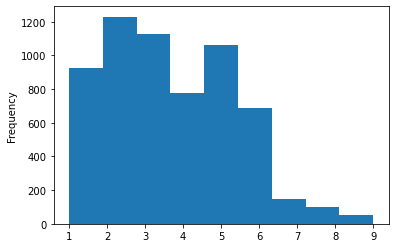

In [724]:
ax = Lead_NAICS['month'].plot.hist(bins=9)

(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.,
        18871.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

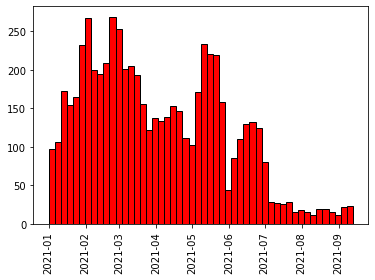

In [702]:
%matplotlib inline
plt.hist(Lead_NAICS.Lead_Capture_Date, bins=50, color='red', edgecolor='black')
plt.xticks(rotation = 90)

In [750]:
NAICS_Count_Data =Lead_NAICS.groupby('Lead_Capture_Date').size().reset_index(name='Count')
NAICS_Count_Data

,Lead_Capture_Date,Count
0,2021-01-01,8
1,2021-01-02,1
2,2021-01-03,1
3,2021-01-04,24
4,2021-01-05,37
...,...,...
244,2021-09-09,3
245,2021-09-10,6
246,2021-09-11,2
247,2021-09-12,3


In [631]:
Lead_filtered.shape

(23527, 26)

In [632]:
Lead_filtered.groupby('Web_Ad_Outlet').sum()['Is_Submitted'].round(decimals=2)

Web_Ad_Outlet
1101.0    3337
Name: Is_Submitted, dtype: int64

In [633]:
Lead_filtered.groupby('Web_Amount_to_Borrow').sum()['Is_Submitted'].round(decimals=2)

Web_Amount_to_Borrow
$10000 to $25000     4
$25000 to $50000     0
$5000 to $10000      0
$50000 to $100000    0
150000.00            4
25000.00             8
250000.00            1
5000.00              3
75000.00             4
Name: Is_Submitted, dtype: int64

In [634]:
Lead_filtered.groupby('Is_Submitted').mean()['Lead_Score'].round(decimals=2)

Is_Submitted
0    18.60
1    19.97
Name: Lead_Score, dtype: float64

In [635]:
Lead_filtered.groupby('Web_Gross_Annual_Sales').sum()['Is_Submitted'].round(decimals=2)

Web_Gross_Annual_Sales
$100k-$200k           1298
$1mm+                  107
$200k-$500k           1170
$500k-$1mm             210
Less than $100,000       6
Name: Is_Submitted, dtype: int64

In [636]:
Lead_filtered.groupby('Web_Time_in_Business').sum()['Is_Submitted'].round(decimals=2)

Web_Time_in_Business
1 to 3 Years            12
6 Months to 1 Year       1
Greater than 3 Years     7
Less than 6 Months       1
Name: Is_Submitted, dtype: int64

In [637]:
Lead_filtered.groupby('Is_Submitted').mean()['Self_Graded_Credit'].round(decimals=2)

Is_Submitted
0    2.94
1    3.14
Name: Self_Graded_Credit, dtype: float64

In [638]:
Lead_filtered.groupby('Legal_Entity_Type_LT').sum()['Is_Submitted'].round(decimals=2)

Legal_Entity_Type_LT
CORPORATION            295
LLC                   2090
PARTNERSHIP              3
SCORPORATION           493
SOLEPROPRIETORSHIP     435
Name: Is_Submitted, dtype: int64

In [639]:
Lead_filtered.groupby('LTTest_Naics').sum()['Is_Submitted'].round(decimals=2)

LTTest_Naics
ACCOMMODATIONANDFOODSERVICES                   143
ACCOUNTANTS                                      0
ADMINSUPPORTWASTEMGMTANDREMEDIATIONSERVICES     14
ADVERTISING_AGENCIES                             0
AGRICULTUREFORESTRYFISHINGANDHUNTING            43
                                              ... 
VENDING                                          1
VETERINARY_SERVICES                              0
VITAMIN_RETAILERS                                0
WHOLESALETRADE                                  61
Wholesale Trade                                  0
Name: Is_Submitted, Length: 125, dtype: int64

In [640]:
Lead_filtered.isnull().sum()

AnnualRevenue                     137
Inception_Date_LT                 137
Is_Funded                           0
Is_Submitted                        0
Lead_Capture_Date                   0
LEAD_ID                             0
Lead_Score                          0
Legal_Entity_Type_LT              137
LT_FILTERID                       136
LTTest_Naics                     6114
OPPORTUNITY_ID                      0
Requested_Amount                  137
Self_Graded_Credit                  1
Submit_for_Pre_Approval_Date    20190
SubYearMonth                    20190
Type_of_Entity                  23519
Web_Ad_Outlet                       0
Web_Ad_Outlet_Source                0
Web_Amount_to_Borrow            23377
Web_Date                            0
Web_Form_Name                   23527
Web_Gross_Annual_Sales           3327
Web_Time_in_Business            23390
Year_Established                23527
Merged Years in Business            0
Years_in_Business                   0
dtype: int64

In [641]:
Lead_filtered = Lead_filtered.drop(['LTTest_Naics','Submit_for_Pre_Approval_Date','Type_of_Entity','LT_FILTERID','Web_Form_Name','Web_Amount_to_Borrow','Web_Date','Web_Time_in_Business','Year_Established','SubYearMonth','Merged Years in Business'], axis=1)
Lead_filtered.sample(10)

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Years_in_Business
17113,200000.0,2014-01-01,0,0,2021-05-05,00Q4u00001f1BcREAU,21,LLC,0064u000015wWCSAA2,20000.0,4.0,1101.0,Lending Tree,NaN,7
3210,750000.0,2019-10-01,0,0,2021-05-19,00Q4u00001f3q4YEAQ,20,LLC,0064u000015xMmTAAU,50000.0,3.0,1101.0,Lending Tree,NaN,2
2848,150000.0,2019-11-01,0,0,2021-05-21,00Q4u00001f45T8EAI,24,LLC,0064u000015xaPkAAI,75000.0,4.0,1101.0,Lending Tree,$100k-$200k,2
9997,312000.0,2018-01-06,0,0,2021-05-14,00Q4u00001f3I6tEAE,17,SOLEPROPRIETORSHIP,0064u000015x7tqAAA,100000.0,3.0,1101.0,Lending Tree,NaN,3
9162,480000.0,2018-04-01,0,1,2021-03-01,00Q4u00001dmnkWEAQ,20,LLC,0064u000016wGsqAAE,80000.0,4.0,1101.0,Lending Tree,$200k-$500k,3
13251,500000.0,2016-09-01,0,0,2021-01-22,00Q4u00001dDypeEAC,19,SCORPORATION,0064u000014ltftAAA,30000.0,3.0,1101.0,Lending Tree,$500k-$1mm,4
11351,140000.0,2017-07-01,0,0,2021-06-27,00Q4u00001fuZpmEAE,24,LLC,0064u000016wPh1AAE,50000.0,2.0,1101.0,Lending Tree,$100k-$200k,4
8900,347000.0,2018-04-16,0,0,2021-02-05,00Q4u00001djmQbEAI,18,LLC,0064u000014mcLHAAY,150000.0,4.0,1101.0,Lending Tree,$200k-$500k,3
13983,1175000.0,2016-04-16,0,0,2021-02-13,00Q4u00001dkbySEAQ,21,LLC,0064u000014n01JAAQ,25000.0,3.0,1101.0,Lending Tree,$1mm+,5
6078,150000.0,2019-02-01,0,0,2021-06-13,00Q4u00001fOtaIEAS,13,LLC,0064u000016va4CAAQ,65000.0,2.0,1101.0,Lending Tree,$100k-$200k,2


In [642]:
Lead_filtered = Lead_filtered.dropna()
Lead_filtered

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Years_in_Business
0,220000.0,2020-09-12,0,1,2021-09-12,00Q4u00001h8MyqEAE,24,SCORPORATION,0064u000017UZzbAAG,65000.0,4.0,1101.0,Lending Tree,$200k-$500k,1
1,225000.0,2020-09-06,0,0,2021-09-10,00Q4u00001h88vdEAA,19,LLC,0064u000017UT6BAAW,25000.0,3.0,1101.0,Lending Tree,$200k-$500k,1
2,115000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy2ocEAA,24,LLC,0064u000017Tvm0AAC,70000.0,2.0,1101.0,Lending Tree,$100k-$200k,1
3,200000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy7ezEAA,10,LLC,0064u000017TxMOAA0,60000.0,1.0,1101.0,Lending Tree,$200k-$500k,1
4,840000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy9GhEAI,21,LLC,0064u000017Ty4QAAS,100000.0,4.0,1101.0,Lending Tree,$500k-$1mm,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23385,360000.0,1917-04-05,0,0,2021-05-22,00Q4u00001fMIcnEAG,22,SCORPORATION,0064u000015xZVxAAM,5000.0,4.0,1101.0,Lending Tree,$200k-$500k,104
23386,2222222.0,1916-05-01,0,0,2021-08-23,00Q4u00001gwPB6EAM,18,CORPORATION,0064u000017TGICAA4,25000.0,2.0,1101.0,Lending Tree,$1mm+,105
23387,200000.0,1915-03-11,0,0,2021-07-19,00Q4u00001fxG1jEAE,18,SOLEPROPRIETORSHIP,0064u000016xfKJAAY,25000.0,3.0,1101.0,Lending Tree,$200k-$500k,106
23388,150000.0,1913-06-19,0,0,2021-02-21,00Q4u00001dlNGvEAM,21,LLC,0064u000014nMrKAAU,50000.0,4.0,1101.0,Lending Tree,$100k-$200k,108


In [546]:
from sklearn.preprocessing import LabelEncoder

Amount_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0, '$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

Lead_filtered['Requested_Amount'].replace(Amount_dict, inplace=True)

#Borrow_dict = {'$10000 to $25000':17500.0,'$100000 or More':100000.0,'100000 or More':100000.0,'$25000 to $50000':37500.0,'$5000 to $10000':7500.0,'$50000 to $100000':75000.0,'0':0}

#LeadScore_df['Web_Amount_to_Borrow'].replace(Borrow_dict, inplace=True)

Sales_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}
             
Lead_filtered['Web_Gross_Annual_Sales'].replace(Sales_dict, inplace=True)

Revenue_dict = {"$100k-$200k":150000.0, "$1mm+":1000000.0, "$200k-$500k":350000.0, "$500k-$1mm":750000.0, 'Less than $100,000':35000.0}

Lead_filtered['AnnualRevenue'].replace(Revenue_dict, inplace=True)

#LeadScore_df['Web_Ad_Outlet'].replace(Source_dict, inplace=True)

Business_dict = {'0-6 Months':0,'1 to 3 Years':1, '1-3 years':2, '3 years or more':3, '6 Months to 1 Year':4, 'Greater than 3 Years':5,'6-12 Months':6, 'Less than 6 Months':7}
Lead_filtered['Years_in_Business'].replace(Business_dict, inplace=True)

Entity_dict = {'CORPORATION':0 ,'LLC':1, 'PARTNERSHIP':2, 'SCORPORATION':3, 'SOLEPROPRIETORSHIP':4 }
Lead_filtered['Legal_Entity_Type_LT'].replace(Entity_dict, inplace=True)

Lead_filtered.sample(10)

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,OPPORTUNITY_ID,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Years_in_Business
3446,200000.0,2019-09-01,0,0,2021-03-23,00Q4u00001e26NqEAI,21,4,0064u000014oxLjAAI,20000.0,4.0,1101.0,Lending Tree,350000.0,2
17150,600000.0,2014-01-01,0,0,2021-07-28,00Q4u00001gT1KNEA0,18,1,0064u000016yKJ2AAM,60000.0,3.0,1101.0,Lending Tree,750000.0,8
4548,200000.0,2019-06-01,0,0,2021-07-22,00Q4u00001gR6fvEAC,21,1,0064u000016xtzMAAQ,25000.0,4.0,1101.0,Lending Tree,350000.0,2
2699,400000.0,2019-11-01,0,0,2021-01-29,00Q4u00001dFkVnEAK,22,1,0064u000014mErWAAU,25000.0,4.0,1101.0,Lending Tree,350000.0,1
18692,200000.0,2011-07-01,0,0,2021-08-30,00Q4u00001gxQBUEA2,24,3,0064u000017ThOnAAK,50000.0,4.0,1101.0,Lending Tree,350000.0,10
14066,200000.0,2016-04-01,0,0,2021-04-07,00Q4u00001eXlgAEAS,13,0,0064u000015v05gAAA,60000.0,2.0,1101.0,Lending Tree,350000.0,5
19921,660000.0,2008-09-09,0,0,2021-08-04,00Q4u00001gTnIdEAK,20,0,0064u000016yksCAAQ,50000.0,3.0,1101.0,Lending Tree,750000.0,13
8996,115000.0,2018-04-01,0,0,2021-03-05,00Q4u00001dnID7EAM,24,1,0064u000014o0AOAAY,30000.0,3.0,1101.0,Lending Tree,150000.0,3
15587,100000.0,2015-04-01,0,0,2021-02-11,00Q4u00001dkTF9EAM,12,1,0064u000014mvffAAA,50000.0,1.0,1101.0,Lending Tree,150000.0,6
524,100000.0,2020-04-01,0,0,2021-07-06,00Q4u00001fvX15EAE,24,1,0064u000016wrUsAAI,50000.0,4.0,1101.0,Lending Tree,150000.0,1


In [547]:
Lead_filtered.dtypes

AnnualRevenue                    float64
Inception_Date_LT         datetime64[ns]
Is_Funded                          int64
Is_Submitted                       int64
Lead_Capture_Date         datetime64[ns]
LEAD_ID                           object
Lead_Score                         int64
Legal_Entity_Type_LT               int64
OPPORTUNITY_ID                    object
Requested_Amount                 float64
Self_Graded_Credit               float64
Web_Ad_Outlet                    float64
Web_Ad_Outlet_Source              object
Web_Gross_Annual_Sales           float64
Years_in_Business                 object
dtype: object

In [548]:
Outlet_dict = {"Lending Tree":1}
             
Lead_filtered['Web_Ad_Outlet_Source'].replace(Outlet_dict, inplace=True)

In [549]:
Lead_filtered["Requested_Amount"]= pd.to_numeric(Lead_filtered["Requested_Amount"], downcast="float")
#LeadScore_df["AnnualRevenue"]= pd.to_numeric(LeadScore_df["AnnualRevenue"], downcast="float")

Lead_filtered["Years_in_Business"]= pd.to_numeric(Lead_filtered["Years_in_Business"], downcast="float")
Lead_filtered["Web_Ad_Outlet_Source"]= pd.to_numeric(Lead_filtered["Web_Ad_Outlet_Source"], downcast="float")

LeadScore_df.head()                                                 

,AnnualRevenue,Inception_Date_LT,Is_Funded,Is_Submitted,Lead_Capture_Date,LEAD_ID,Lead_Score,Legal_Entity_Type_LT,LT_FILTERID,LTTest_Naics,...,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Amount_to_Borrow,Web_Date,Web_Form_Name,Web_Gross_Annual_Sales,Web_Time_in_Business,Year_Established,Merged Years in Business,Years_in_Business
0,220000.0,2020-09-12,0,1,2021-09-12,00Q4u00001h8MyqEAE,24,SCORPORATION,902934.0,ACCOMMODATIONANDFOODSERVICES,...,1101.0,Lending Tree,NaN,2021-09-12,NaN,$200k-$500k,NaN,NaN,-1,1
1,225000.0,2020-09-06,0,0,2021-09-10,00Q4u00001h88vdEAA,19,LLC,900069.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-10,NaN,$200k-$500k,NaN,NaN,-1,1
2,115000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy2ocEAA,24,LLC,902932.0,TRANSPORTATIONANDWAREHOUSING,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$100k-$200k,NaN,NaN,-1,1
3,200000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy7ezEAA,10,LLC,900069.0,RETAILTRADE,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$200k-$500k,NaN,NaN,-1,1
4,840000.0,2020-09-01,0,0,2021-09-02,00Q4u00001gy9GhEAI,21,LLC,900070.0,OTHERSERVICESEXCEPTPUBLICADMINISTRATION,...,1101.0,Lending Tree,NaN,2021-09-02,NaN,$500k-$1mm,NaN,NaN,-1,1


In [550]:
Lead_filtered.describe()

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Legal_Entity_Type_LT,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Years_in_Business
count,2.007000e+04,20070.000000,20070.000000,20070.000000,20070.000000,2.007000e+04,20070.000000,20070.0,20070.0,20070.000000,20070.000000
mean,5.051256e+05,0.020877,0.138017,18.694469,1.721226,7.185832e+04,2.952815,1101.0,1.0,346719.232686,6.953812
std,3.543392e+06,0.142976,0.344926,3.941665,1.311689,1.267006e+05,0.997339,0.0,0.0,226635.452052,8.478543
min,0.000000e+00,0.000000,0.000000,8.000000,0.000000,2.000000e+03,1.000000,1101.0,1.0,35000.000000,1.000000
25%,1.500000e+05,0.000000,0.000000,16.000000,1.000000,2.000000e+04,2.000000,1101.0,1.0,150000.000000,2.000000
50%,2.100000e+05,0.000000,0.000000,19.000000,1.000000,4.575000e+04,3.000000,1101.0,1.0,350000.000000,4.000000
75%,3.000000e+05,0.000000,0.000000,22.000000,3.000000,8.000000e+04,4.000000,1101.0,1.0,350000.000000,8.000000
max,1.000000e+08,1.000000,1.000000,24.000000,4.000000,2.000000e+06,4.000000,1101.0,1.0,1000000.000000,114.000000


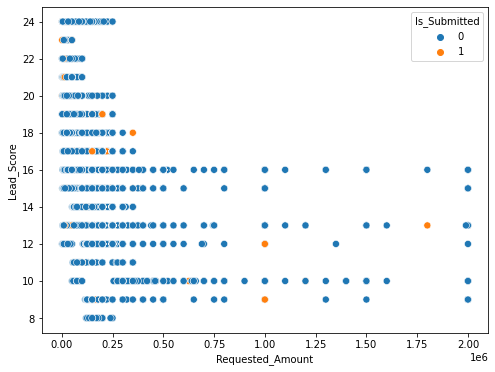

In [551]:
#%matplotlib inline
plt.figure(figsize=(8,6))
sns.scatterplot("Requested_Amount","Lead_Score", hue="Is_Submitted", data=Lead_filtered, s=50)
plt.show()

In [552]:
Submitted = (sum(Lead_filtered["Is_Submitted"])/len(Lead_filtered['Is_Submitted'].index))*100
Submitted

13.801694070752365

In [553]:
Lead_cluster_data = Lead_filtered.groupby(['Is_Submitted']).mean()
Lead_cluster_data

,AnnualRevenue,Is_Funded,Lead_Score,Legal_Entity_Type_LT,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Years_in_Business
Is_Submitted,,,,,,,,,,
0,527975.649480,0.000116,18.512197,1.739017,75603.546875,2.924971,1101.0,1.0,352328.612717,7.144509
1,362415.807942,0.150542,19.832852,1.610108,48483.246094,3.126715,1101.0,1.0,311685.920578,5.762816


In [554]:
Lead_filtered.corr()

,AnnualRevenue,Is_Funded,Is_Submitted,Lead_Score,Legal_Entity_Type_LT,Requested_Amount,Self_Graded_Credit,Web_Ad_Outlet,Web_Ad_Outlet_Source,Web_Gross_Annual_Sales,Years_in_Business
AnnualRevenue,1.000000,-0.001447,-0.016116,0.002581,-0.025907,0.010353,-0.011019,NaN,NaN,0.235400,0.065670
Is_Funded,-0.001447,1.000000,0.362899,0.045978,-0.021573,-0.029861,0.006559,NaN,NaN,-0.029641,-0.026744
Is_Submitted,-0.016116,0.362899,1.000000,0.115568,-0.033898,-0.073829,0.069772,NaN,NaN,-0.061856,-0.056210
Lead_Score,0.002581,0.045978,0.115568,1.000000,0.025699,-0.329404,0.607780,NaN,NaN,-0.105239,-0.098081
Legal_Entity_Type_LT,-0.025907,-0.021573,-0.033898,0.025699,1.000000,-0.022064,0.183856,NaN,NaN,-0.151958,0.059131
Requested_Amount,0.010353,-0.029861,-0.073829,-0.329404,-0.022064,1.000000,-0.099608,NaN,NaN,0.145025,0.066110
Self_Graded_Credit,-0.011019,0.006559,0.069772,0.607780,0.183856,-0.099608,1.000000,NaN,NaN,-0.060642,-0.073397
Web_Ad_Outlet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Web_Ad_Outlet_Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Web_Gross_Annual_Sales,0.235400,-0.029641,-0.061856,-0.105239,-0.151958,0.145025,-0.060642,NaN,NaN,1.000000,0.148239


In [555]:
X = Lead_filtered[['Requested_Amount','AnnualRevenue','Web_Gross_Annual_Sales',
                 'Lead_Score','Self_Graded_Credit','Years_in_Business','Legal_Entity_Type_LT']]

y = Lead_filtered[['Is_Submitted']]

In [556]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [557]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [558]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                14049
Model:                            GLM   Df Residuals:                    14041
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5510.2
Date:                Tue, 21 Sep 2021   Deviance:                       11020.
Time:                        11:41:16   Pearson chi2:                 1.43e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9981      0.109    -18.265      0.000      -2.213      -1.784
x1            -5.0500      0.913     -5.533      0.000      -6.839      -3.261
x2            -1.1827      1.370     -0.863      0.388      -3.867       1.502
x3            -0.5154      0.124     -4.140      0.000      -0.759      -0.271
x4             0.9182      0.136      6.755      0.000       0.652       1.185
x5             0.1474      0.093      1.589      0.112      -0.034       0.329
x6            -1.9350      0.420     -4.609      0.000      -2.758      -1.112
x7            -0.4032      0.080     -5.046      0.000      -0.560      -0.247
==============================================================================
"""

In [560]:
X_train.shape, y_train.shape

((14049, 7), (14049, 1))

In [561]:
X_test.shape, y_test.shape

((6021, 7), (6021, 1))

In [562]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),X,y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)


[learning_curve] Training set sizes: [  180   545   910  1275  1640  2005  2370  2735  3100  3465  3830  4195
  4559  4924  5289  5654  6019  6384  6749  7114  7479  7844  8209  8574
  8939  9304  9669 10034 10399 10764 11129 11493 11858 12223 12588 12953
 13318 13683 14048 14413 14778 15143 15508 15873 16238 16603 16968 17333
 17698 18063]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


In [563]:
train_mean = np.mean(train_scores, axis =1)
train_mean

array([0.97722222, 0.96385321, 0.95010989, 0.95239216, 0.94762195,
       0.9444389 , 0.942827  , 0.94354662, 0.94270968, 0.94222222,
       0.94093995, 0.94102503, 0.94187322, 0.94220146, 0.94136888,
       0.9407676 , 0.94183419, 0.9418703 , 0.94179879, 0.94262019,
       0.94293355, 0.94352371, 0.94373249, 0.94383018, 0.9442667 ,
       0.94512038, 0.94631296, 0.94695037, 0.94736994, 0.94790041,
       0.94880043, 0.94969982, 0.95010963, 0.95096948, 0.95165237,
       0.9522736 , 0.95306352, 0.95385515, 0.95447751, 0.95490182,
       0.95586683, 0.95670607, 0.95740263, 0.95815536, 0.95888656,
       0.95947118, 0.96018388, 0.96088963, 0.96165103, 0.96240381])

In [564]:
train_std = np.std(train_scores, axis=1)
train_std

array([0.00166667, 0.00296431, 0.00565053, 0.00070588, 0.00126295,
       0.00197244, 0.00227418, 0.00230782, 0.00192037, 0.00162131,
       0.00337169, 0.00255677, 0.00255235, 0.00261217, 0.00327422,
       0.00344453, 0.00293034, 0.00241497, 0.00163364, 0.00173053,
       0.00251626, 0.00282778, 0.00335759, 0.00357175, 0.00400886,
       0.00385561, 0.00382287, 0.00367344, 0.00364204, 0.00348892,
       0.00340261, 0.00333314, 0.00302964, 0.00332488, 0.0030213 ,
       0.00310997, 0.0030586 , 0.00292447, 0.00298877, 0.00280392,
       0.00299194, 0.0029561 , 0.00281963, 0.00275978, 0.00272215,
       0.00271523, 0.00264342, 0.00261428, 0.00253663, 0.00245303])

In [565]:
test_mean = np.mean(test_scores, axis =1)
test_mean

array([0.8081714 , 0.83158944, 0.84030892, 0.85246637, 0.85221724,
       0.8406577 , 0.82162431, 0.82291978, 0.81833582, 0.82282013,
       0.82247135, 0.81474838, 0.82486298, 0.82705531, 0.83612357,
       0.83931241, 0.83801694, 0.81728949, 0.82107623, 0.82461385,
       0.82381664, 0.82421525, 0.77503737, 0.81145989, 0.81410065,
       0.81878426, 0.82286996, 0.82331839, 0.8003986 , 0.81230693,
       0.81425012, 0.81674141, 0.81489786, 0.75176881, 0.77254609,
       0.77224714, 0.77349278, 0.77832586, 0.78510214, 0.73318386,
       0.73522671, 0.74230194, 0.74743398, 0.7529148 , 0.71753861,
       0.73692078, 0.75032387, 0.75625311, 0.75899352, 0.76203288])

In [566]:
test_std = np.std(test_scores, axis=1)
test_std

array([0.06191461, 0.01708808, 0.01765156, 0.01786712, 0.01699221,
       0.01440607, 0.03867379, 0.02129274, 0.01109714, 0.01066128,
       0.01179942, 0.02782643, 0.0138892 , 0.01453414, 0.02010443,
       0.02142878, 0.02029371, 0.04625365, 0.02860133, 0.02250662,
       0.01863131, 0.01992875, 0.13070792, 0.03624018, 0.02356857,
       0.02129023, 0.02267722, 0.02273948, 0.06265011, 0.03719745,
       0.03597934, 0.03430362, 0.03260457, 0.18244038, 0.12688251,
       0.12345907, 0.12521706, 0.11309897, 0.10350281, 0.16512334,
       0.15837228, 0.15456701, 0.14390986, 0.12769973, 0.14475904,
       0.11392907, 0.08953496, 0.08491629, 0.08894173, 0.08164142])

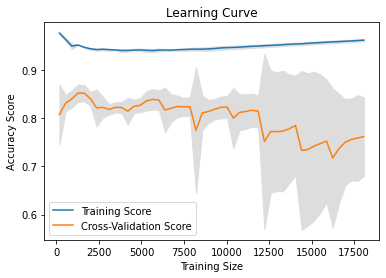

In [567]:
plt.plot(train_sizes, train_mean, label= 'Training Score')
plt.plot(train_sizes, test_mean, label= 'Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [568]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.003601
Feature 1: 0.000919
Feature 2: 0.005293
Feature 3: 0.011060
Feature 4: 0.002243
Feature 5: 0.000000
Feature 6: 0.000215


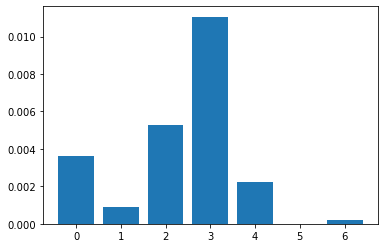

In [569]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [471]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [472]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 7)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [473]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [474]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [475]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Requested_Amount', True, 1),
 ('AnnualRevenue', True, 1),
 ('Web_Gross_Annual_Sales', True, 1),
 ('Lead_Score', True, 1),
 ('Self_Graded_Credit', True, 1),
 ('Years_in_Business', True, 1),
 ('Legal_Entity_Type_LT', True, 1)]

In [476]:
col = X_train.columns[rfe.support_]
col

Index(['Requested_Amount', 'AnnualRevenue', 'Web_Gross_Annual_Sales',
       'Lead_Score', 'Self_Graded_Credit', 'Years_in_Business',
       'Legal_Entity_Type_LT'],
      dtype='object')

In [477]:
X_train_sm = sm.add_constant(X_train[col].values)

X_train_sm = sm.add_constant(X_train[col].values)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Is_Submitted   No. Observations:                14049
Model:                            GLM   Df Residuals:                    14041
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5510.2
Date:                Tue, 21 Sep 2021   Deviance:                       11020.
Time:                        11:32:19   Pearson chi2:                 1.43e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9981      0.109    -18.265      0.000      -2.213      -1.784
x1            -5.0500      0.913     -5.533      0.000      -6.839      -3.261
x2            -1.1827      1.370     -0.863      0.388      -3.867       1.502
x3            -0.5154      0.124     -4.140      0.000      -0.759      -0.271
x4             0.9182      0.136      6.755      0.000       0.652       1.185
x5             0.1474      0.093      1.589      0.112      -0.034       0.329
x6            -1.9350      0.420     -4.609      0.000      -2.758      -1.112
x7            -0.4032      0.080     -5.046      0.000      -0.560      -0.247
==============================================================================
"""

In [478]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.09215237, 0.05583165, 0.16438443, 0.02895621, 0.11982516,
       0.18952968, 0.12997988, 0.13157503, 0.11340861, 0.10130345])

In [479]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.09215237, 0.05583165, 0.16438443, 0.02895621, 0.11982516,
       0.18952968, 0.12997988, 0.13157503, 0.11340861, 0.10130345])

In [480]:
# find the predicted-prob
Submitted_prob = y_train_pred
Submitted = y_train.values
y_train_pred_final = pd.DataFrame(Submitted,Submitted_prob)
                                  
                                   
y_train_pred_final['Prospect_ID'] = y_train.index

y_train_pred_final

,0,Prospect_ID
0.092152,0,20972
0.055832,0,22605
0.164384,0,10090
0.028956,0,23355
0.119825,0,10344
...,...,...
0.104918,0,15418
0.060955,0,22913
0.128436,1,11616
0.162106,0,12707


In [481]:
y_train_pred_final.reset_index(inplace=True)

In [482]:
y_train_pred_final.rename(columns = {"index":"Submitted_Prob", 0:"Submitted"}, inplace=True)

In [483]:
y_train_pred_final['predicted'] = y_train_pred_final.Submitted_Prob.apply(lambda x: 1 if x > 0.14 else 0)

# Let's see the head
y_train_pred_final.head()

,Submitted_Prob,Submitted,Prospect_ID,predicted
0,0.092152,0,20972,0
1,0.055832,0,22605,0
2,0.164384,0,10090,1
3,0.028956,0,23355,0
4,0.119825,0,10344,0


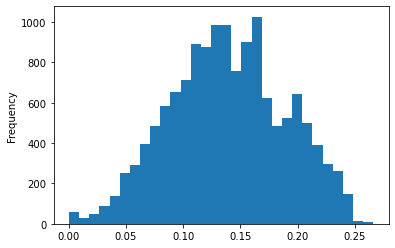

In [484]:
ax = y_train_pred_final['Submitted_Prob'].plot.hist(bins=30)

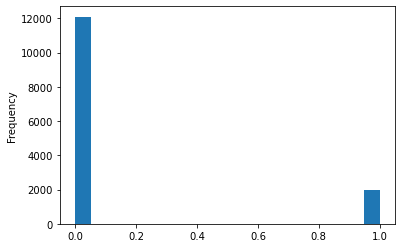

In [485]:
ax = y_train_pred_final['Submitted'].plot.hist(bins=20)

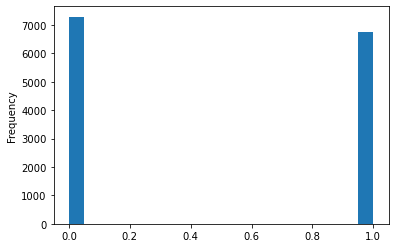

In [486]:
ax = y_train_pred_final['predicted'].plot.hist(bins=20)

In [493]:
y_train_pred_final.to_csv('Sub_probLN.csv', index = True)

In [494]:
import imblearn

In [495]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)
# fit predictor and target 

variablex_ros, y_ros = ros.fit_resample(X, y)


print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Is_Submitted': 1})
Resample dataset shape Counter({'Is_Submitted': 1})


In [496]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({'Is_Submitted': 1})


In [497]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.856


In [498]:
#  Logistic regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [499]:
accuracy_logreg = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.51112717 0.50289017 0.50867052 0.52774566 0.54407514]
Mean Accuracy Score for Log Reg: 0.5189017341040463



In [500]:
accuracy_score(y_test,y_pred, normalize=True) * 100

86.38899960143483

In [501]:
print("Training score:", model.score(X_train, y_train))

Training score: 0.8613473292585703


In [502]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [503]:
scores

{'fit_time': array([0.08700895, 0.03000212, 0.04400229, 0.0340023 , 0.03900027]),
 'score_time': array([0.01400113, 0.01000166, 0.01200414, 0.01200128, 0.01300216]),
 'test_acc': array([0.51112717, 0.50289017, 0.50867052, 0.52774566, 0.54407514]),
 'test_prec': array([0.5140255 , 0.50746269, 0.52202643, 0.54379562, 0.5635152 ]),
 'test_rec': array([0.40780347, 0.19653179, 0.20549133, 0.34450867, 0.39104046]),
 'test_f1': array([0.45479452, 0.28333333, 0.29489838, 0.42179759, 0.46169596])}

In [504]:
KNN_model = KNeighborsClassifier()

In [505]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.7382948  0.72846821 0.73598266 0.73858382 0.74075145]
Mean Accuracy Score for KNN: 0.7364161849710983


In [506]:
param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 1}
Best Cross Vlidation Score: 0.7744508670520232


In [509]:
parameters = {'splitter': ('best','random'),
             'max_depth': [2,4,6],
             'max_features':[2,4,6, None],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 2, 'splitter': 'best'}

In [510]:
model = DecisionTreeClassifier(splitter=grid_search.best_params_['splitter'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                      max_features=grid_search.best_params_['max_features'],
                                       criterion= grid_search.best_params_['criterion'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=2)

In [511]:
y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100

print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 67.41040462427745
Out-of-sample Accuracy: 66.39306358381502


In [512]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix
[[2463 1807]
 [1100 3280]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      4270
           1       0.64      0.75      0.69      4380

    accuracy                           0.66      8650
   macro avg       0.67      0.66      0.66      8650
weighted avg       0.67      0.66      0.66      8650



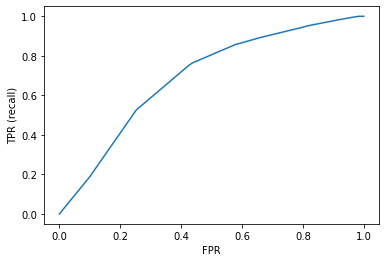

In [513]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [514]:
y_pred_prob =model.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

In [515]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.693


In [516]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.18273217 0.58968906 0.7436846  0.6920628  0.17075136]


In [517]:
feature_names = X = LeadScore_df[['Requested_Amount','AnnualRevenue','Web_Gross_Annual_Sales',
                 'Lead_Score','Self_Graded_Credit','Years_in_Business','Legal_Entity_Type_LT']]

In [518]:
#print(feature_names)
model.feature_importances_

array([0.00737515, 0.08798698, 0.00338831, 0.02326786, 0.36170452,
       0.07616409, 0.44011308])

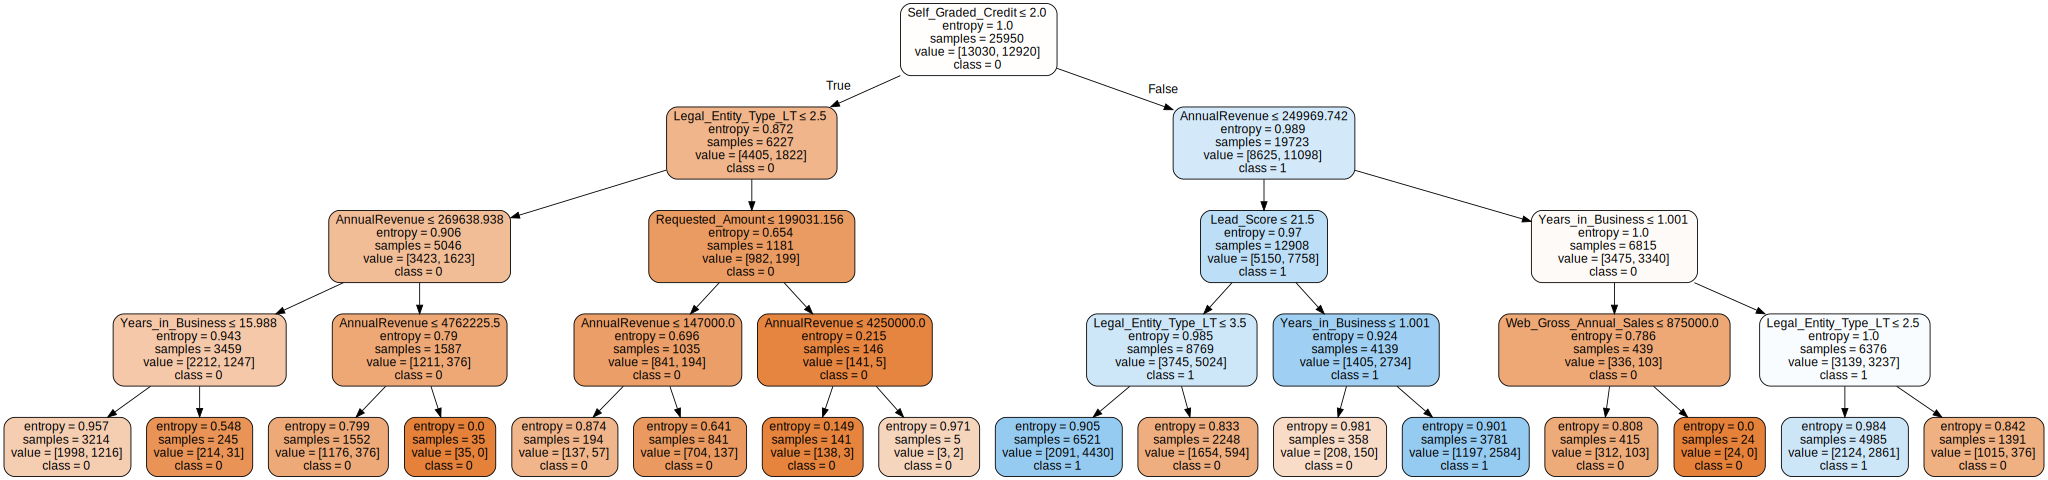

<Figure size 1440x1080 with 0 Axes>

In [519]:
from sklearn import tree
import graphviz
fig = plt.figure(figsize=(20,15))

class_names = ['0', '1']
feature_names = X.columns

dot_data = tree.export_graphviz(model, 
                  feature_names=feature_names, 
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                  out_file=None)
                           
graph = graphviz.Source(dot_data)
graph

In [520]:
graph.render("decision_treeLeadLN_graphviz")
'decision_treeLeadLN_graphviz.png'

'decision_treeLeadLN_graphviz.png'

In [521]:
## Calculating feature_importance = 
model.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_names, model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'Feature_Importance'}, inplace = True)
feat_imp.sort_values(by=['Feature_Importance'], ascending=False).head()

,Feature_Importance
Legal_Entity_Type_LT,0.440113
Self_Graded_Credit,0.361705
AnnualRevenue,0.087987
Years_in_Business,0.076164
Lead_Score,0.023268


In [522]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

y_train_hat = model.predict(X_train)
y_pred = model.predict(X_test)

in_sample_acc = accuracy_score(y_train,y_train_hat, normalize=True) * 100

out_of_sample_acc = accuracy_score(y_test,y_pred, normalize=True) * 100
print("In-sample Accuracy:", in_sample_acc)
print("Out-of-sample Accuracy:", out_of_sample_acc)

In-sample Accuracy: 97.60308285163777
Out-of-sample Accuracy: 86.89017341040463


In [643]:
feature_names = X = LeadScore_df[['Requested_Amount','AnnualRevenue','Web_Gross_Annual_Sales',
                 'Lead_Score','Self_Graded_Credit','Years_in_Business','Legal_Entity_Type_LT']]

In [644]:
model.feature_importances_

array([0.1513455 , 0.18652685, 0.01531704, 0.07591254, 0.24085037,
       0.23262505, 0.09742265])

In [351]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [352]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [353]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6091329479768786


In [ ]:
# Random sample of 200 rows
#df.sample(n=200).head(10)


# Saving the randomly sampled rows:
#df200 = df.sample(n=200)
#df200.shape
# Output: (200, 5)

In [ ]:
#len(CreditRisk_merge['contract_number'].unique())